In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

## 1. Format the Data

In [2]:
df = pd.read_csv('../../DSI-CHI-1/lessons/week-07/3.3-classifier-clustering/assets/datasets/airport2.csv')
print df.shape
df

(33, 6)


,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33
2,ABQ,2006,392,329,71,124
3,ABQ,2007,366,304,107,45
4,ABQ,2008,333,300,79,42
5,ABQ,2009,192,162,74,26
6,ABQ,2010,222,177,71,50
7,ABQ,2011,345,294,77,61
8,ABQ,2012,237,181,65,60
9,ABQ,2013,232,212,62,46


Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [3]:
df['Airport'].value_counts()

ANC    11
ATL    11
ABQ    11
Name: Airport, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Airport'])
le.classes_

array(['ABQ', 'ANC', 'ATL'], dtype=object)

In [5]:
df['Label'] = le.transform(df['Airport'])

In [6]:
df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Label
0,ABQ,2004,242,235,71,46,0
1,ABQ,2005,221,190,61,33,0
2,ABQ,2006,392,329,71,124,0
3,ABQ,2007,366,304,107,45,0
4,ABQ,2008,333,300,79,42,0


## 2. Plot the data

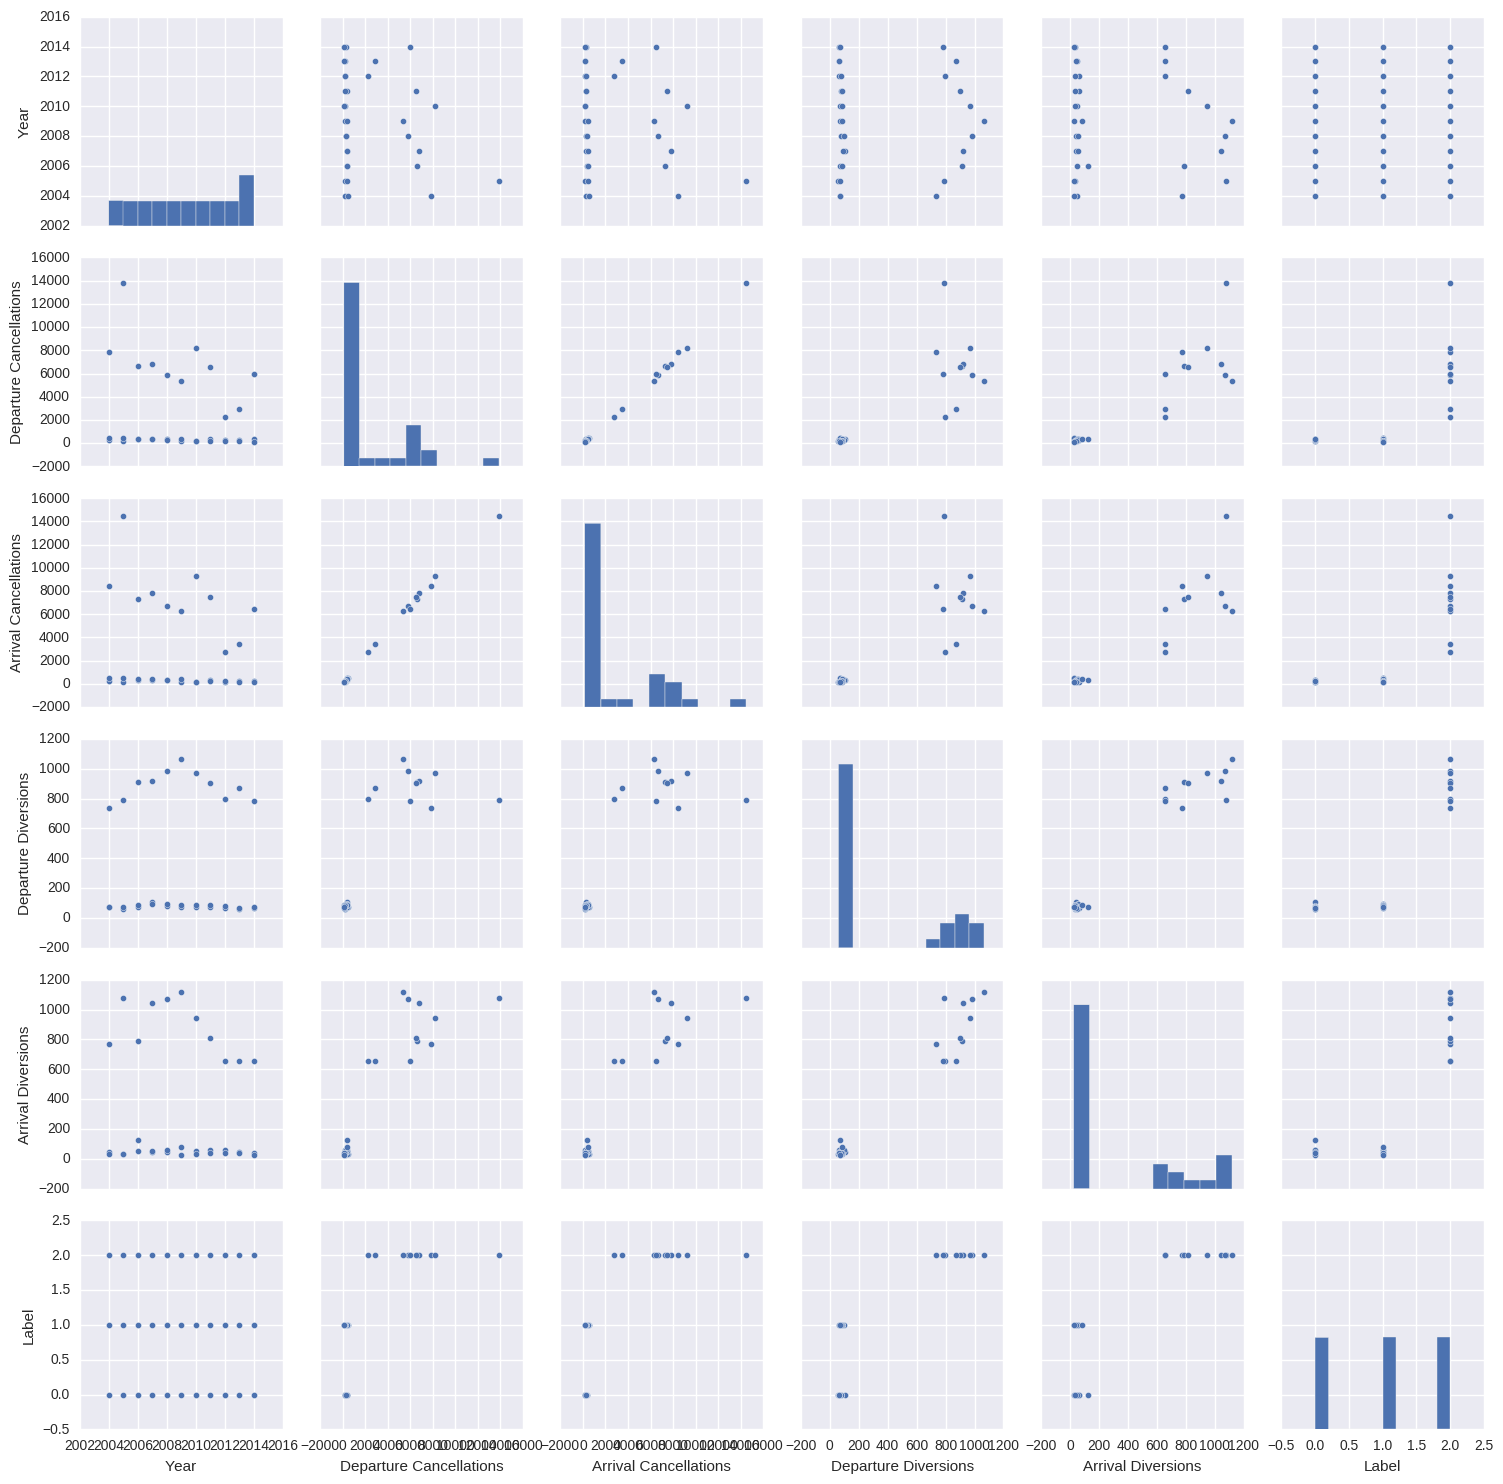

In [7]:
import seaborn as sns
sns.pairplot(df)

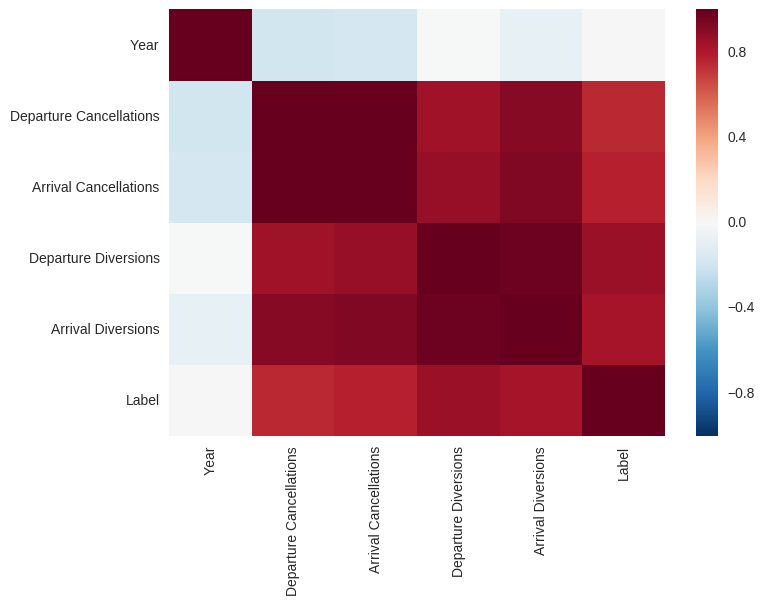

In [8]:
sns.heatmap(df.corr())

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [9]:
data = df.drop(['Airport', 'Label'], axis=1)
labels = df['Label']
labels

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
Name: Label, dtype: int64

In [10]:
data

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,2004,242,235,71,46
1,2005,221,190,61,33
2,2006,392,329,71,124
3,2007,366,304,107,45
4,2008,333,300,79,42
5,2009,192,162,74,26
6,2010,222,177,71,50
7,2011,345,294,77,61
8,2012,237,181,65,60
9,2013,232,212,62,46


#### 3.2 Conduct the k-means clustering

In [11]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data)
X

array([[-1.58113883, -0.62717893, -0.64478985, -0.71598822, -0.68715588],
       [-1.26491106, -0.63335711, -0.65688837, -0.74198978, -0.71947934],
       [-0.9486833 , -0.58304907, -0.6195174 , -0.71598822, -0.49321518],
       [-0.63245553, -0.59069824, -0.62623879, -0.62238263, -0.6896423 ],
       [-0.31622777, -0.60040681, -0.62731422, -0.69518698, -0.69710156],
       [ 0.        , -0.64188888, -0.66441634, -0.70818776, -0.73688427],
       [ 0.31622777, -0.63306291, -0.6603835 , -0.71598822, -0.67721021],
       [ 0.63245553, -0.59687642, -0.62892735, -0.70038729, -0.64985959],
       [ 0.9486833 , -0.62864992, -0.65930807, -0.73158915, -0.65234601],
       [ 1.26491106, -0.63012092, -0.65097354, -0.73938962, -0.68715588],
       [ 1.58113883, -0.60570239, -0.63430447, -0.728989  , -0.70953366],
       [-1.58113883, -0.55921894, -0.56493964, -0.71078791, -0.72693859],
       [-1.26491106, -0.5736347 , -0.57784473, -0.70818776, -0.72445217],
       [-0.9486833 , -0.59040404, -0.5

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(X)
predictions = kmeans.predict(X)

In [13]:
final_df = df.join(pd.DataFrame(predictions, columns=['Predicted Label']))
final_df

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Label,Predicted Label
0,ABQ,2004,242,235,71,46,0,0
1,ABQ,2005,221,190,61,33,0,0
2,ABQ,2006,392,329,71,124,0,0
3,ABQ,2007,366,304,107,45,0,0
4,ABQ,2008,333,300,79,42,0,0
5,ABQ,2009,192,162,74,26,0,0
6,ABQ,2010,222,177,71,50,0,2
7,ABQ,2011,345,294,77,61,0,2
8,ABQ,2012,237,181,65,60,0,2
9,ABQ,2013,232,212,62,46,0,2


#### 3.3 Compute the labels and centroids

In [14]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [15]:
labels

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
centroids

array([[-0.79056942, -0.60052939, -0.61452116, -0.68998667, -0.67348058],
       [ 0.        ,  1.23226618,  1.25932119,  1.39911994,  1.36707855],
       [ 0.9486833 , -0.63485752, -0.64782793, -0.71104793, -0.69560971]])

#### 3.4 Format the resulting predicted "y" variables and check the accuracy score, classification report, and confusion matrix

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

confusion = pd.DataFrame(confusion_matrix(final_df['Label'], final_df['Predicted Label']))
confusion

,0,1,2
0,6,0,5
1,6,0,5
2,0,11,0


In [20]:
print classification_report(final_df['Label'], final_df['Predicted Label'])

             precision    recall  f1-score   support

          0       0.50      0.55      0.52        11
          1       0.00      0.00      0.00        11
          2       0.00      0.00      0.00        11

avg / total       0.17      0.18      0.17        33



In [21]:
accuracy_score(final_df['Label'], final_df['Predicted Label'])

0.18181818181818182

**Question**: What are we understand from this these performance metrics? 

Literally nothing because the labels don't match up

## 4. Extra Trees Classifier

## 5. KNN Classifier

## 6. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

#### 6.2 Plot the Denrogram

## Extra Trees Classifier

## KNN Classifier